Name : Shubh Goyal

Project : Big Mart Sales Prediction , The topic of "Big Mart Sales Prediction using Machine Learning with Python" is focused on using
machine learning algorithms to predict sales in a retail setting. The goal is to create a predictive 
model that can accurately forecast sales for individual products in different stores



Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
# Loading the data from csv file to Pandas DataFrame
import pandas as pd
big_mart_data = pd.read_csv('/content/Train.csv')

In [ ]:
# Displaying the first 5 rows of the dataframe
print(big_mart_data.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [ ]:
# Printing the number of data points & number of features
print("Number of data points & features:", big_mart_data.shape)

Number of data points & features: (8523, 12)


In [ ]:
# Printing some information about the dataset
print(big_mart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [ ]:
# Checking for missing values
print(big_mart_data.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


Handling Missing Values

Mean --> average

Mode --> more repeated value

In [ ]:
# Calculating the mean value of "Item_Weight" column
item_weight_mean = big_mart_data['Item_Weight'].mean()
print("Mean value of 'Item_Weight' column:", item_weight_mean)

Mean value of 'Item_Weight' column: 12.857645184135976


In [ ]:
# Filling the missing values in "Item_weight" column with "Mean" value
big_mart_data['Item_Weight'].fillna(item_weight_mean, inplace=True)

In [ ]:
# Calculating the mode of "Outlet_Size" column
mode_of_Outlet_size = big_mart_data.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode()[0])
print("Mode of 'Outlet_Size' column:", mode_of_Outlet_size)

Mode of 'Outlet_Size' column: Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object


In [ ]:
# Filling the missing values in "Outlet_Size" column with mode of corresponding Outlet_Type
big_mart_data['Outlet_Size'] = big_mart_data.apply(lambda x: mode_of_Outlet_size[x['Outlet_Type']] if pd.isnull(x['Outlet_Size']) else x['Outlet_Size'], axis=1)


In [ ]:
# Checking for missing values
print(big_mart_data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Data Analysis

In [ ]:
# Displaying the descriptive statistics of the DataFrame
print(big_mart_data.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.226124         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.857645         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Numerical Features

In [ ]:
sns.set()

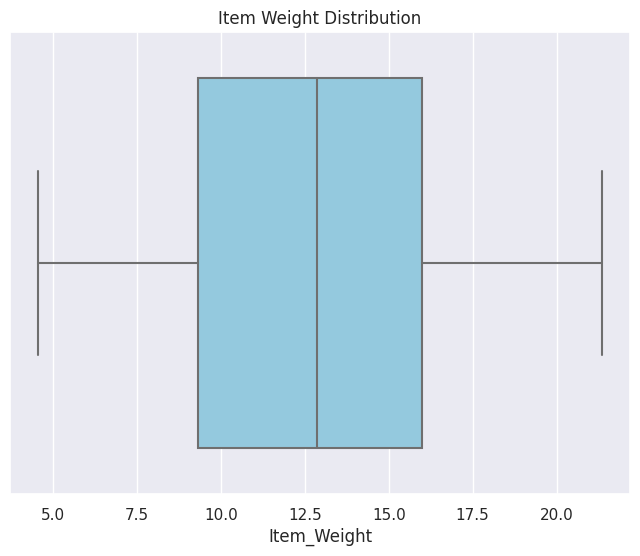

In [ ]:
# Item_Weight distribution
plt.figure(figsize=(8,6))
sns.boxplot(x=big_mart_data['Item_Weight'], color='skyblue')
plt.title('Item Weight Distribution')
plt.show()

<ipython-input-16-97b31988f1d7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(big_mart_data['Item_Visibility'], shade=True, color='salmon')


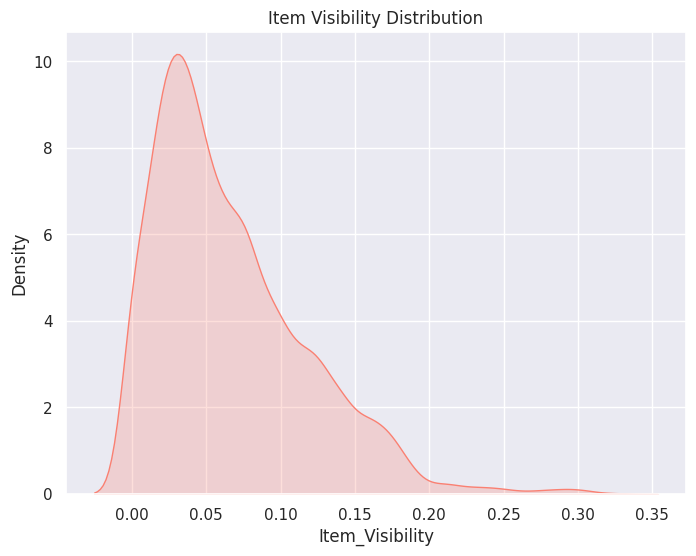

In [ ]:
# Item Visibility distribution
plt.figure(figsize=(8,6))
sns.kdeplot(big_mart_data['Item_Visibility'], shade=True, color='salmon')
plt.title('Item Visibility Distribution')
plt.show()

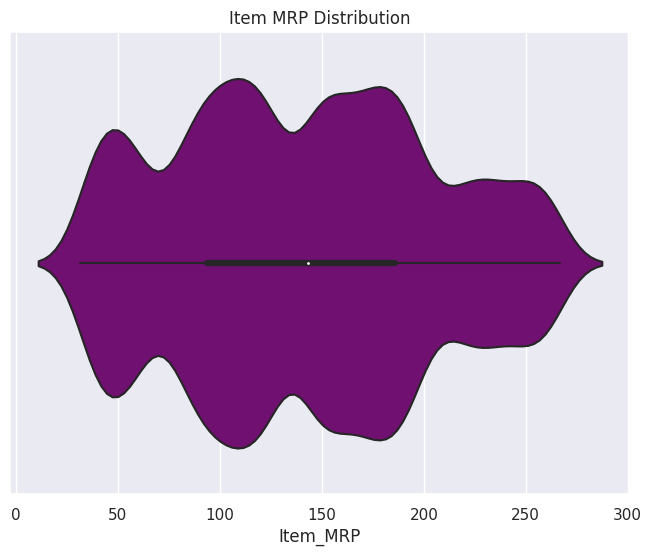

In [ ]:
# Item MRP distribution
plt.figure(figsize=(8,6))
sns.violinplot(x=big_mart_data['Item_MRP'], color='purple')
plt.title('Item MRP Distribution')
plt.show()

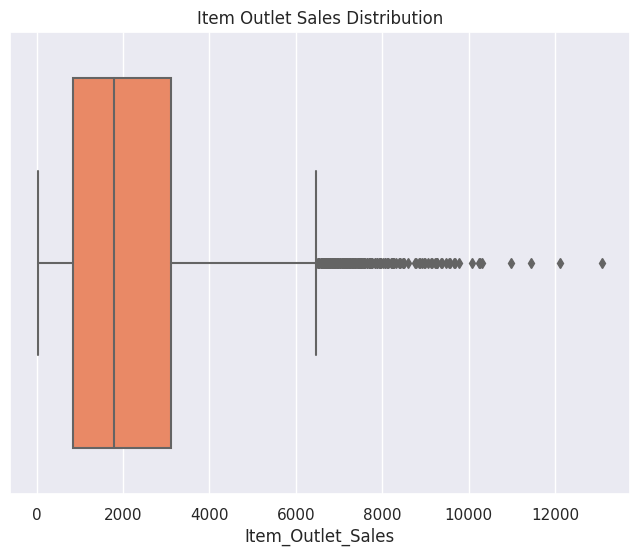

In [ ]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(8,6))
sns.boxplot(x=big_mart_data['Item_Outlet_Sales'], color='coral')
plt.title('Item Outlet Sales Distribution')
plt.show()

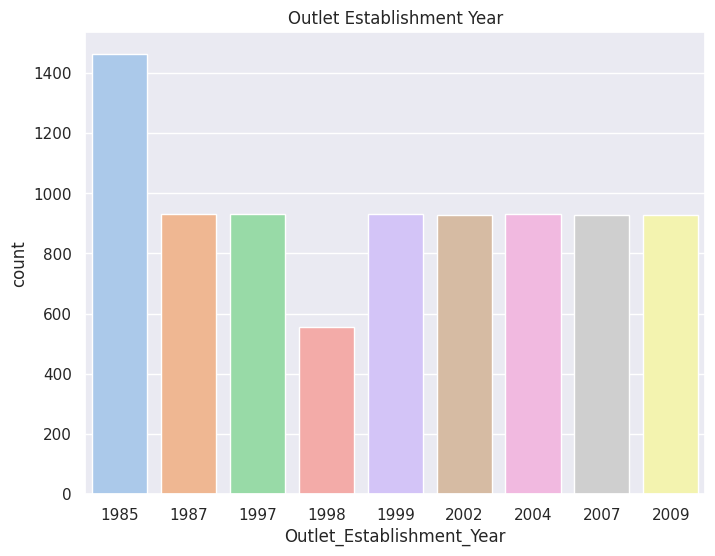

In [ ]:
# Outlet_Establishment_Year column
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data, palette='pastel')
plt.title('Outlet Establishment Year')
plt.show()

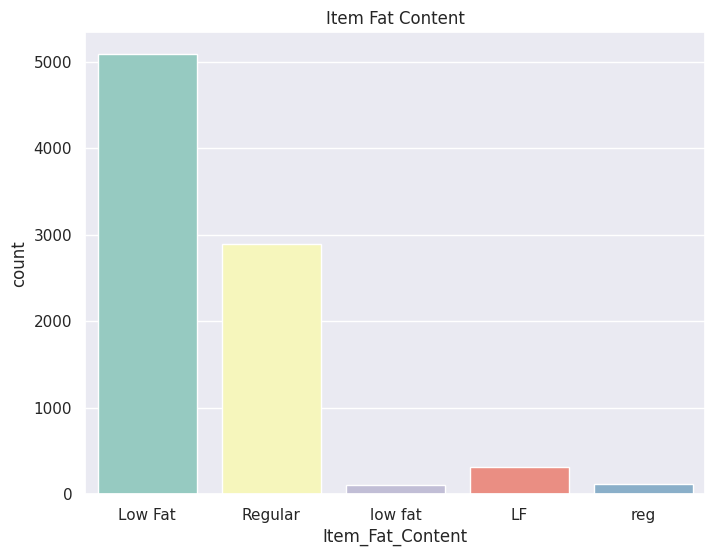

In [ ]:
# Item_Fat_Content column
plt.figure(figsize=(8,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data, palette='Set3')
plt.title('Item Fat Content')
plt.show()

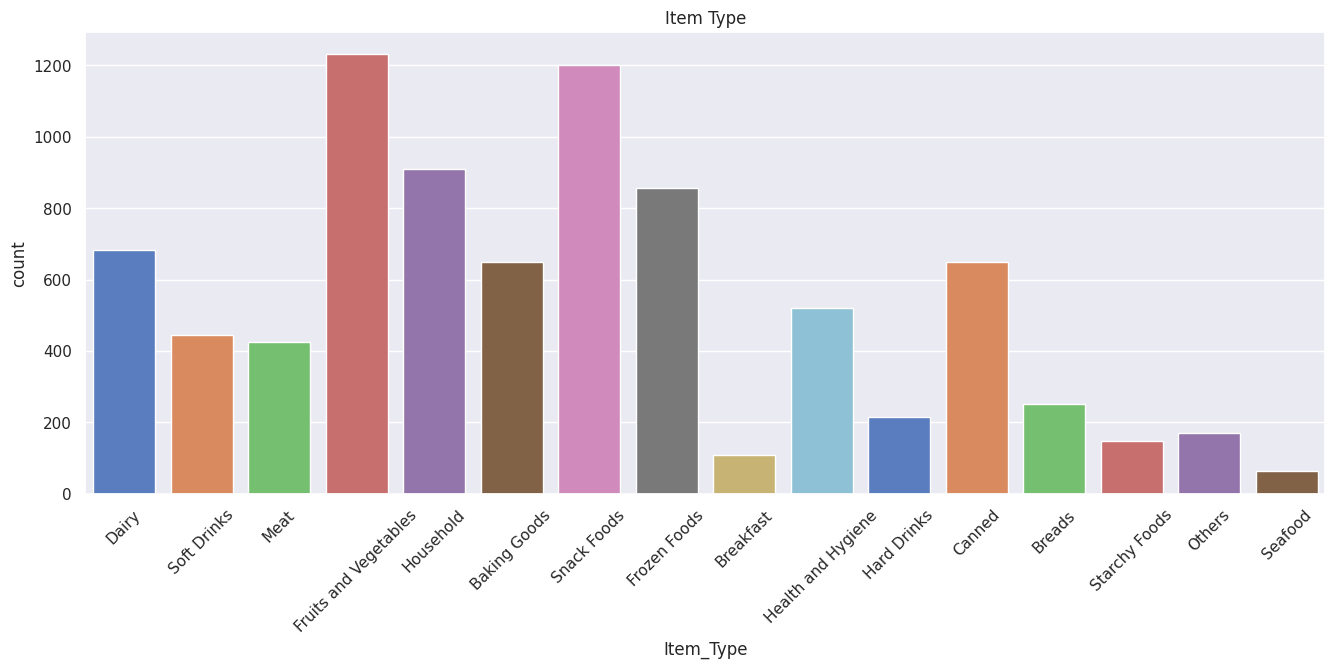

In [ ]:
# Item_Type column
plt.figure(figsize=(16,6))
sns.countplot(x='Item_Type', data=big_mart_data, palette='muted')
plt.title('Item Type')
plt.xticks(rotation=45)
plt.show()

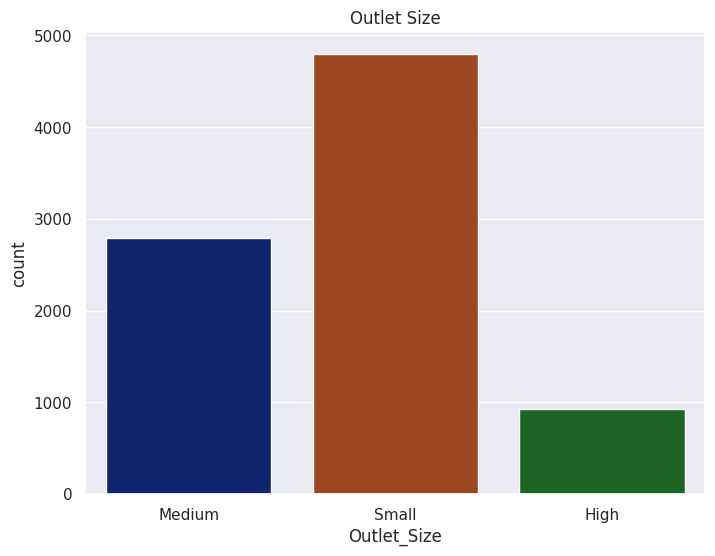

In [ ]:
# Outlet_Size column
plt.figure(figsize=(8,6))
sns.countplot(x='Outlet_Size', data=big_mart_data, palette='dark')
plt.title('Outlet Size')
plt.show()

Data Pre-Processing

In [ ]:
# Replacing 'Item_Fat_Content' column values
big_mart_data['Item_Fat_Content'] = big_mart_data['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})


In [ ]:
# Printing the count of 'Item_Fat_Content' column values after replacement
print(big_mart_data['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Label Encoding

In [ ]:
encoder = LabelEncoder()

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Splitting features and Target

In [ ]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
print(X)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [ ]:
Y = big_mart_data['Item_Outlet_Sales']
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)


(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model Training

XGBoost Regressor

In [ ]:
# perform one-hot encoding on categorical columns
cat_cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
X_train = pd.get_dummies(X_train, columns=cat_cols)
X_test = pd.get_dummies(X_test, columns=cat_cols)

In [ ]:
regressor = XGBRegressor()


In [ ]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)


In [ ]:
print('R Squared value = ', r2_train)


R Squared value =  0.7322421068603824


In [ ]:
# fit the model on training data
regressor.fit(X_test, Y_test)

# prediction on test data
test_data_prediction = regressor.predict(X_test)

# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

print('R Squared value = ', r2_test)


R Squared value =  0.8425734053294198
